#Lab 1

# Logistic Regression example
test

Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

Dataset exploration

In [ ]:
df = pd.read_csv("./sample_data/california_housing_train.csv")
test_df = None

print(df)

df.describe()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Data Preprocessing

In [ ]:
X = df.drop('median_house_value', axis=1)
Y = df[['median_house_value']] # [[ ]] used to keep the label

# classify the houses as expensive and cheap houses
Y.loc[Y['median_house_value'] <= 220000, 'median_house_value'] = 0
Y.loc[Y['median_house_value'] > 220000, 'median_house_value'] = 1

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15)

print(X)
print(Y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  
0   

<ipython-input-12-ee5f58f70524>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y['median_house_value'] <= 220000, 'median_house_value'] = 0
<ipython-input-12-ee5f58f70524>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y['median_house_value'] > 220000, 'median_house_value'] = 1


Training example

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, np.ravel(Y_train))

# just to show you what np.ravel does
print(Y_train)
print(np.ravel(Y_train))

       median_house_value
13677                 1.0
1215                  0.0
11432                 0.0
12727                 0.0
4528                  1.0
...                   ...
7231                  1.0
14628                 0.0
10001                 0.0
4977                  1.0
12787                 1.0

[14450 rows x 1 columns]
[1. 0. 0. ... 0. 1. 1.]


Learning Curves example

F1 Score Train: 1.0
F1 Score Validation: 0.5899731423455686
F1 Score Train: 0.7056491575817642
F1 Score Validation: 0.7466354593329434
F1 Score Train: 0.7168049792531122
F1 Score Validation: 0.7488479262672812
F1 Score Train: 0.738481935697713
F1 Score Validation: 0.75028636884307
F1 Score Train: 0.7442430181283685
F1 Score Validation: 0.7595505617977527
F1 Score Train: 0.7422680412371133
F1 Score Validation: 0.7597073719752391
F1 Score Train: 0.7410832232496698
F1 Score Validation: 0.7532763532763532
F1 Score Train: 0.7372314696258357
F1 Score Validation: 0.7568181818181818
F1 Score Train: 0.7378592044171162
F1 Score Validation: 0.7566951566951566
F1 Score Train: 0.7401417811253876
F1 Score Validation: 0.7590909090909091


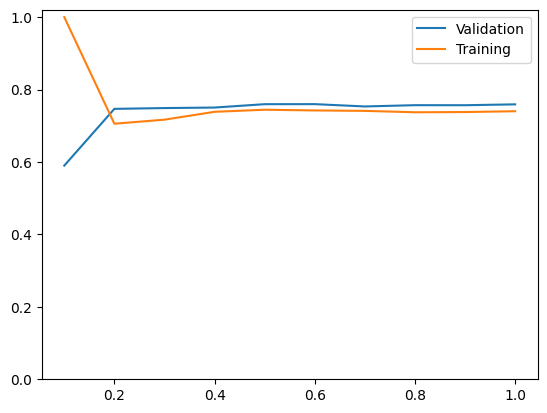

In [ ]:
import matplotlib.pyplot as plt

list_f1=[]
list_f1_train=[]
list_sample_size=[]

for times in range(10):
  # training
  #
  X, X_unused, y, y_unused = train_test_split(X_train, Y_train, test_size=1 - (times * 0.1 + 0.001))

  classifier = LogisticRegression(max_iter=2000)
  classifier.fit(X, np.ravel(y))

  results_train = classifier.predict(X)

  # validation
  #
  results = classifier.predict(X_val)

  # score
  #
  f1_train = f1_score(y, results_train)
  print("F1 Score Train: " + str(f1_train))

  f1 = f1_score(Y_val, results)
  print("F1 Score Validation: " + str(f1))

  list_f1.append(f1)
  list_f1_train.append(f1_train)
  list_sample_size.append((times * 0.1 + 0.1))

plt.plot(list_sample_size, list_f1)
plt.plot(list_sample_size, list_f1_train)

plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])

## Vectorizer Example

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?',
]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus) # IMPORTANT: fit_transform

print(vectorizer.get_feature_names_out())
print(X.toarray())

corpus2 = [
  'This  the first document.',
  'This document is the second document.',
  'And this is third one.',
  'Is this the first?',
]

X = vectorizer.transform(corpus2) # IMPORTANT: transform

print(vectorizer.get_feature_names_out())
print(X.toarray())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 0 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 0 1]]
